# Transformações dos Dados

In [1]:
%run ../services/imports.py
%run ../services/visualization.py 

importing Jupyter notebook from /home/jean/project/project_dataScience_POSCOMP/notebooks/../services/especialidades.ipynb


In [2]:
visualizacao = Visualizacao()

In [3]:
dataset = pd.read_csv('../dados/dataset_poscomp.csv')

In [40]:
dataset.columns

Index(['INSCRICAO', 'NOME', 'SEXO', 'ESTADO', 'ESPECIALIDADE', 'PRESENTE',
       'CARGO', 'Matemática Discreta', 'Cálculo Diferencial e Integral',
       'Álgebra Linear', 'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados', 'ANO', 'IDADE', 'matematica', 'fund_computacao',
       'tec_computacao', 'total', 'REGIAO'],
      dtype='object')

## Adicionar os eixos e somar de cada candidato

In [4]:
dataset = dataset.rename(columns={'PRESENTE DIA1': 'PRESENTE'})

In [5]:
regioes_brasil_siglas = {'norte': ['AM', 'TO', 'PA', 'AC', 'AP', 'RR','RO'],
                         'nordeste': ['MA', 'RN', 'PB', 'SE', 'BA', 'AL', 'PE', 'CE', 'PI'],
                         'centro_oeste': ['MT', 'GO', 'MS', 'DF'],
                            'sudeste':['RJ', 'SP', 'ES', 'MG'],
                          'sul':['PR', 'SC', 'RS']}

In [6]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in regioes_brasil_siglas:
    dataset.loc[dataset['ESTADO'].isin(regioes_brasil_siglas[i]), 'REGIAO'] = i

In [7]:
dados_poscomp = dataset.drop_duplicates(subset='INSCRICAO', keep='first')
dados_poscomp = dados_poscomp.set_index('INSCRICAO')

In [8]:
estados_brasileiros = {0: 'AC',
           1: 'AL',
           2: 'AM',
           3: 'AP',
           4: 'BA',
           5: 'CE',
           6: 'DF',
           7: 'ES',
           8: 'GO',
           9: 'MA',
           10: 'MG',
           11: 'MS',
           12: 'MT',
           13: 'PA',
           14: 'PB',
           15: 'PE',
           16: 'PI',
           17: 'PR',
           18: 'RJ',
           19: 'RN',
           20: 'RO',
           21: 'RR',
           22: 'RS',
           23: 'SC',
           24: 'SP',
           25: 'SE',
           26: 'TO'}

In [9]:
# visualizacao.plot_top_especialidades_por_sexo(dados_poscomp, 'M', top_n=10, save_path='imagens/espec_masculino.eps')
# visualizacao.plot_top_especialidades_por_sexo(dados_poscomp, 'F', top_n=10, save_path='imagens/espec_feminino.eps')

In [10]:
media_hist = dados_poscomp.query('PRESENTE == "S"')

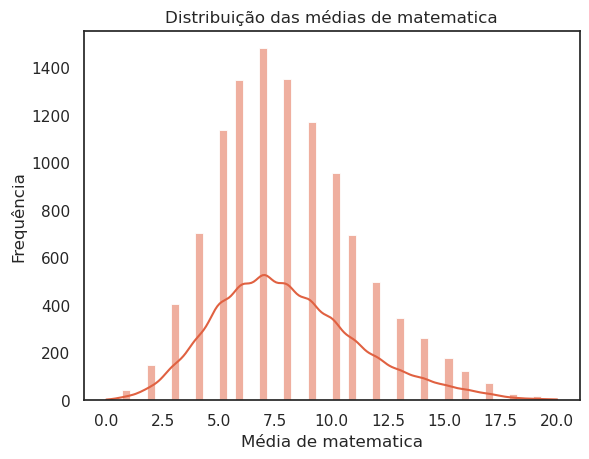

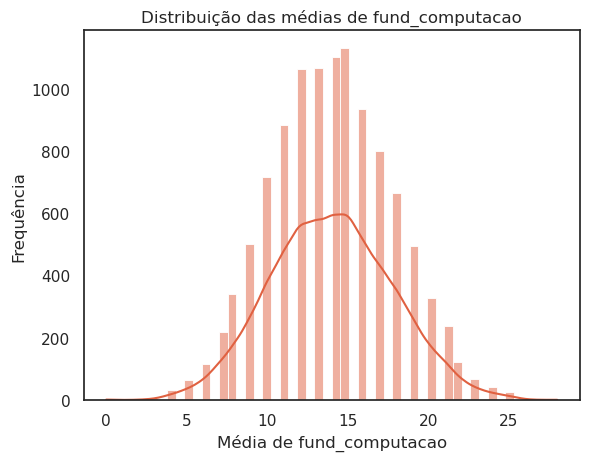

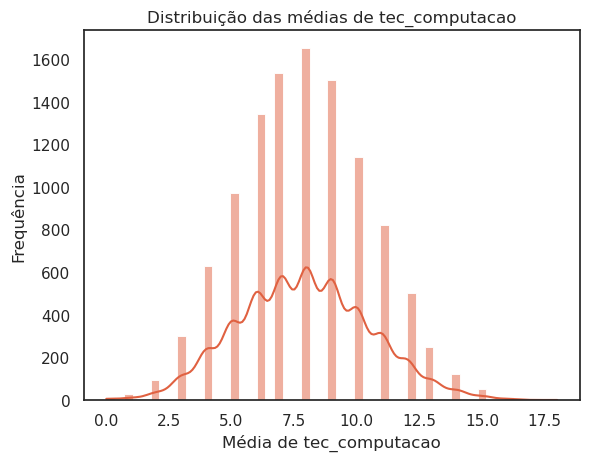

In [11]:
def plot_histogram(dataset, columns):
    for column in columns:
        sns.histplot(dataset[column], kde=True)
        plt.xlabel(f'Média de {column}')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição das médias de {column}')
        plt.show()

columns = ['matematica', 'fund_computacao', 'tec_computacao']
plot_histogram(media_hist, columns)

In [12]:
media = dados_poscomp['total'].mean()
desvio_padrao = dados_poscomp['total'].std()
variancia = dados_poscomp['total'].var()

In [13]:
print(f'Média: {media}, Desvio Padrão: {desvio_padrao}, Variância: {variancia}')

Média: 29.879555393586006, Desvio Padrão: 7.535880896523616, Variância: 56.78950088658958


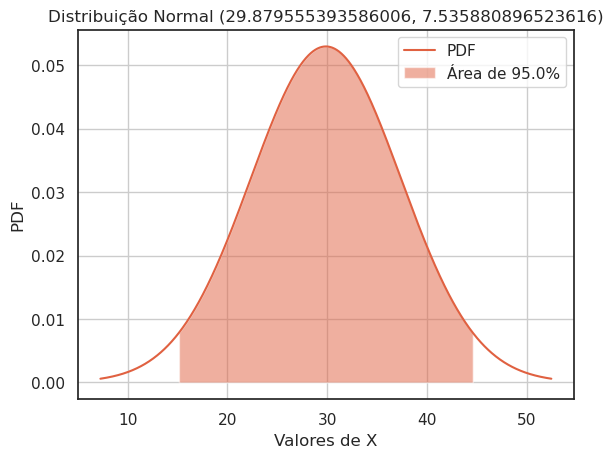

Intervalo de 95.0% de probabilidade: [15.11, 44.65]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Probabilidade desejada
probabilidade = 0.95

# Encontre os valores de X correspondentes ao intervalo de probabilidade
limite_inferior, limite_superior = norm.interval(probabilidade, loc=media, scale=desvio_padrao)

# Valores para o gráfico
x = np.linspace(media - 3 * desvio_padrao, media + 3 * desvio_padrao, 1000)
pdf = norm.pdf(x, loc=media, scale=desvio_padrao)

# Plote o gráfico da PDF
plt.plot(x, pdf, label='PDF')
plt.fill_between(x, pdf, where=(x >= limite_inferior) & (x <= limite_superior), alpha=0.5, label=f'Área de {probabilidade*100}%')
plt.xlabel('Valores de X')
plt.ylabel('PDF')
plt.title(f'Distribuição Normal ({media}, {desvio_padrao})')

# Exiba o gráfico
plt.legend()
plt.grid(True)
plt.show()

# Exiba o intervalo de valores de X correspondentes à probabilidade
print(f'Intervalo de {probabilidade*100}% de probabilidade: [{limite_inferior:.2f}, {limite_superior:.2f}]')

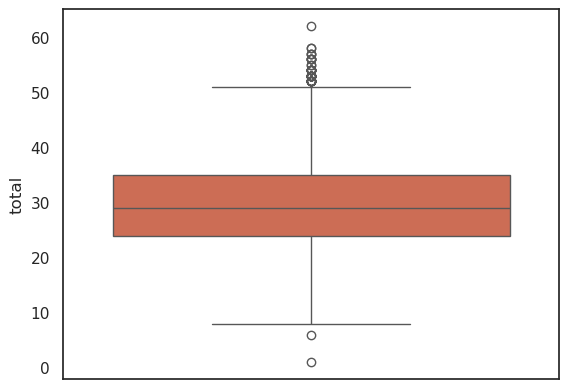

In [15]:
sns.boxplot(y=dados_poscomp["total"]);

#### Técnica para eliminar os outlier

In [16]:
df = dados_poscomp.copy()

In [17]:
def check_outlier(value, quantiles, amplitude):
    if (value < quantiles[0] - (1 * amplitude)) or (value > quantiles[2] + (1 * amplitude)):
        return True
    return False

In [18]:
# quartis das quantidades de caracteres dos títulos
import statistics

quantiles_nota = statistics.quantiles(df["total"])
print("Quartis de nota total:", quantiles_nota)
amplitude_nota = quantiles_nota[2] - quantiles_nota[0]
print("Amplitude interquartil de nota:", amplitude_nota)

quantiles_mat = statistics.quantiles(df["matematica"])
print("Quartis de nota matematica:", quantiles_mat)
amplitude_mat = quantiles_mat[2] - quantiles_mat[0]
print("Amplitude interquartil de nota:", amplitude_mat)

quantiles_fund = statistics.quantiles(df["fund_computacao"])
print("Quartis de nota Fundamento da Computação:", quantiles_fund)
amplitude_fund = quantiles_fund[2] - quantiles_fund[0]
print("Amplitude interquartil de nota:", amplitude_fund)

quantiles_tec = statistics.quantiles(df["tec_computacao"])
print("Quartis de nota Tecnologia da Computação:", quantiles_tec)
amplitude_tec = quantiles_tec[2] - quantiles_tec[0]
print("Amplitude interquartil de nota:", amplitude_tec)

Quartis de nota total: [24.0, 29.0, 35.0]
Amplitude interquartil de nota: 11.0
Quartis de nota matematica: [6.0, 8.0, 10.0]
Amplitude interquartil de nota: 4.0
Quartis de nota Fundamento da Computação: [11.0, 14.0, 17.0]
Amplitude interquartil de nota: 6.0
Quartis de nota Tecnologia da Computação: [6.0, 8.0, 10.0]
Amplitude interquartil de nota: 4.0


In [19]:
# determinação dos outliers nos títulos
df["outlier_nota"] = df["total"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_nota,
    amplitude=amplitude_nota
))
df["outlier_mat"] = df["matematica"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_mat,
    amplitude=amplitude_mat
))
df["outlier_fund"] = df["fund_computacao"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_fund,
    amplitude=amplitude_fund
))
df["outlier_tec"] = df["tec_computacao"].map(lambda x: check_outlier(
    value=x,
    quantiles=quantiles_tec,
    amplitude=amplitude_tec
))


In [20]:
df.outlier_fund.value_counts()

outlier_fund
False    10856
True       120
Name: count, dtype: int64

In [21]:
df.outlier_tec.value_counts()

outlier_tec
False    10865
True       111
Name: count, dtype: int64

In [22]:
df.outlier_mat.value_counts()

outlier_mat
False    10502
True       474
Name: count, dtype: int64

In [23]:
df.outlier_nota.value_counts()

outlier_nota
False    10725
True       251
Name: count, dtype: int64

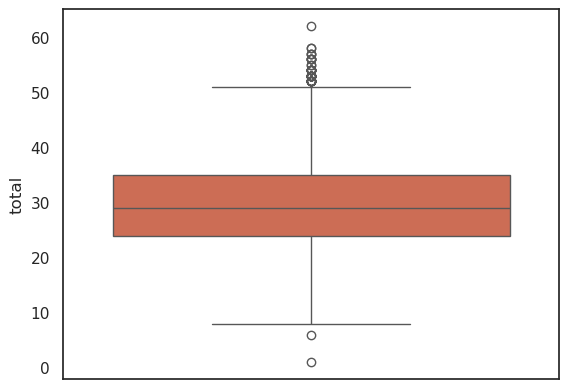

In [24]:
sns.boxplot(y=df["total"]);

In [25]:
df = df.loc[~((df["outlier_nota"]) | (df['outlier_fund']) | (df['outlier_mat']) | (df['outlier_tec']))]
df = df.iloc[:,:-4]
df.shape

(10288, 38)

In [26]:
dados_poscomp.describe().T

,count,mean,std,min,25%,50%,75%,max
Matemática Discreta,10976.0,1.228407,0.827014,0.0,1.0,1.0,2.0,3.0
Cálculo Diferencial e Integral,10976.0,1.104136,0.827653,0.0,1.0,1.0,2.0,3.0
Álgebra Linear,10976.0,1.298834,0.967717,0.0,1.0,1.0,2.0,3.0
Geometria Analítica,10976.0,1.025875,0.897917,0.0,0.0,1.0,2.0,3.0
Análise Combinatória,10976.0,1.203171,0.891311,0.0,1.0,1.0,2.0,3.0
Probabilidade e Estatística,10976.0,0.830266,0.692872,0.0,0.0,1.0,1.0,2.0
Lógica Matemática,10976.0,1.329355,0.881518,0.0,1.0,1.0,2.0,3.0
Organização de Arquivos e Dados,10976.0,0.762391,0.760549,0.0,0.0,1.0,1.0,3.0
Técnicas de Programação,10976.0,2.196429,0.717659,0.0,2.0,2.0,3.0,3.0
Circuitos Digitais,10976.0,1.256560,0.855774,0.0,1.0,1.0,2.0,3.0


In [27]:
df = df[df['IDADE'] >= 18]

In [28]:
df.shape

(10288, 38)

In [29]:
# print(f'Perda - {(374 / 9849) * 100:.2f}% dos dados') # informação importante

In [30]:
# Pegar apenas os candidatos com nota final acima de 17 pontos.
nova_dados_poscomp = dados_poscomp[dados_poscomp['total'] >= 17]

In [39]:
nova_dados_poscomp.columns

Index(['SEXO', 'ESTADO', 'ESPECIALIDADE', 'Matemática Discreta',
       'Cálculo Diferencial e Integral', 'Álgebra Linear',
       'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados', 'IDADE', 'matematica', 'fund_computacao',
       'tec_computacao', 'total', 'REGIAO'],
      dtype='object')

In [31]:
nova_dados_poscomp = nova_dados_poscomp[nova_dados_poscomp['IDADE'] >= 18]

In [32]:
nova_dados_poscomp = nova_dados_poscomp.drop(['NOME','PRESENTE','CARGO', 'ANO'], axis=1)

In [33]:
df = df.drop(['NOME','PRESENTE','CARGO', 'ANO'], axis=1)

###### Transformar os tipos de dados

In [34]:
list_disc = ['Matemática Discreta',
       'Cálculo Diferencial e Integral', 'Álgebra Linear',
       'Geometria Analítica', 'Análise Combinatória',
       'Probabilidade e Estatística', 'Lógica Matemática',
       'Organização de Arquivos e Dados', 'Técnicas de Programação',
       'Circuitos Digitais', 'Análise de Algoritmos', 'Teoria dos Grafos',
       'Linguagens Formais, Autômatos e Computabilidade',
       'Algoritmos e Estruturas de Dados', 'Linguagens de Programação',
       'Sistemas Operacionais', 'Arquitetura e Organização de Computadores',
       'Redes de Computadores', 'Computação Gráfica',
       'Inteligência Artificial', 'Engenharia de Software',
       'Sistemas Distribuídos', 'Compiladores', 'Processamento de Imagens',
       'Banco de Dados','matematica', 'fund_computacao',
       'tec_computacao', 'total']

In [35]:
list_categorico = ['SEXO', 'ESTADO', 'ESPECIALIDADE','linhas_pesquisas', 'area_concentration',
       'REGIAO',]

In [36]:
df[list_disc] = df[list_disc].astype(int)
df[list_categorico] = df[list_categorico].astype('category')

KeyError: "['linhas_pesquisas', 'area_concentration'] not in index"

In [38]:
nova_dados_poscomp[list_disc] = nova_dados_poscomp[list_disc].astype(int)
nova_dados_poscomp[list_categorico] = nova_dados_poscomp[list_categorico].astype('category')

KeyError: "['linhas_pesquisas', 'area_concentration'] not in index"

In [ ]:
# nova_dados_poscomp = nova_dados_poscomp[(nova_dados_poscomp['linhas_pesquisas'] != 'Demais areas') & (nova_dados_poscomp['linhas_pesquisas'] != 'Outros')]

In [ ]:
df = df[(df['linhas_pesquisas'] != 'Demais areas') & (df['linhas_pesquisas'] != 'Outros')]

In [ ]:
# nova_dados_poscomp.to_csv('../dados/df_poscomp.csv', index=False)

In [ ]:
# df.to_csv('../dados/df_poscompTest.csv', index=False)

## Verificar o comportamento dos candidatos de acordo com a linha de pesquisa

In [ ]:
nova_dados_poscomp.head()

In [ ]:
nova_dados_poscomp['area_concentration'].value_counts()

In [ ]:
nova_dados_poscomp['linhas_pesquisas'].value_counts()

In [ ]:
# plt.figure(figsize=(20, 15))
# plot = sns.lmplot(x="total", y="total", data=dados_poscomp, fit_reg=False, hue='linhas_pesquisas', legend=False)

# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
# plt.show()